In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('adult.csv')

In [73]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [74]:
df.isnull().sum()

39                0
 State-gov        0
77516             0
 Bachelors        0
13                0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
2174              0
0                 0
40                0
 United-States    0
 <=50K            0
dtype: int64

In [75]:
df.columns

Index(['39', ' State-gov', '77516', ' Bachelors', '13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', '2174', '0', '40',
       ' United-States', ' <=50K'],
      dtype='object')

In [76]:
df.drop([' State-gov',' United-States'],axis=1,inplace=True)

In [77]:
df.head(15)

,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
0,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
5,49,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K
6,52,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,>50K
7,31,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,>50K
8,42,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,>50K
9,37,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,>50K


In [78]:
#lets check some value counts 
df[' Never-married'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  Never-married, dtype: int64

In [79]:
df[' Not-in-family'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  Not-in-family, dtype: int64

In [80]:
df[' Adm-clerical'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  Adm-clerical, dtype: int64

In [81]:
#as these entities dont show any importance to target column lets drop these columns
df.drop([' Never-married',' Not-in-family',' Adm-clerical'],inplace=True,axis=1)

In [82]:
df.head(10)

,39,77516,Bachelors,13,White,Male,2174,0,40,<=50K
0,50,83311,Bachelors,13,White,Male,0,0,13,<=50K
1,38,215646,HS-grad,9,White,Male,0,0,40,<=50K
2,53,234721,11th,7,Black,Male,0,0,40,<=50K
3,28,338409,Bachelors,13,Black,Female,0,0,40,<=50K
4,37,284582,Masters,14,White,Female,0,0,40,<=50K
5,49,160187,9th,5,Black,Female,0,0,16,<=50K
6,52,209642,HS-grad,9,White,Male,0,0,45,>50K
7,31,45781,Masters,14,White,Female,14084,0,50,>50K
8,42,159449,Bachelors,13,White,Male,5178,0,40,>50K
9,37,280464,Some-college,10,Black,Male,0,0,80,>50K


In [83]:
#lets again check with the Bachelors
df[' Bachelors'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Bachelors, dtype: int64

In [84]:
#lets delete these Bachelors name column as well
df.drop([' Bachelors'],inplace=True,axis=1)

In [85]:
df.head(10)

,39,77516,13,White,Male,2174,0,40,<=50K
0,50,83311,13,White,Male,0,0,13,<=50K
1,38,215646,9,White,Male,0,0,40,<=50K
2,53,234721,7,Black,Male,0,0,40,<=50K
3,28,338409,13,Black,Female,0,0,40,<=50K
4,37,284582,14,White,Female,0,0,40,<=50K
5,49,160187,5,Black,Female,0,0,16,<=50K
6,52,209642,9,White,Male,0,0,45,>50K
7,31,45781,14,White,Female,14084,0,50,>50K
8,42,159449,13,White,Male,5178,0,40,>50K
9,37,280464,10,Black,Male,0,0,80,>50K


In [86]:
#Lets check the white column as well 
df[' White'].value_counts()
#as this column also dont shows any importance so again will drop this one as well

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  White, dtype: int64

In [87]:
df.drop([' White'],axis=1,inplace=True)

In [88]:
df.head(10)

,39,77516,13,Male,2174,0,40,<=50K
0,50,83311,13,Male,0,0,13,<=50K
1,38,215646,9,Male,0,0,40,<=50K
2,53,234721,7,Male,0,0,40,<=50K
3,28,338409,13,Female,0,0,40,<=50K
4,37,284582,14,Female,0,0,40,<=50K
5,49,160187,5,Female,0,0,16,<=50K
6,52,209642,9,Male,0,0,45,>50K
7,31,45781,14,Female,14084,0,50,>50K
8,42,159449,13,Male,5178,0,40,>50K
9,37,280464,10,Male,0,0,80,>50K


In [89]:
#lets convert Male data into the numeric form
gender = pd.get_dummies(df[' Male'],drop_first=True)

In [91]:
#Lets change the name of the male column
df = df.rename(columns={" Male":"Gender"})

In [92]:
df.head(10)

,39,77516,13,Gender,2174,0,40,<=50K
0,50,83311,13,Male,0,0,13,<=50K
1,38,215646,9,Male,0,0,40,<=50K
2,53,234721,7,Male,0,0,40,<=50K
3,28,338409,13,Female,0,0,40,<=50K
4,37,284582,14,Female,0,0,40,<=50K
5,49,160187,5,Female,0,0,16,<=50K
6,52,209642,9,Male,0,0,45,>50K
7,31,45781,14,Female,14084,0,50,>50K
8,42,159449,13,Male,5178,0,40,>50K
9,37,280464,10,Male,0,0,80,>50K


In [95]:
df = pd.concat([df,gender],axis=1)
df.head(10)

,39,77516,13,Gender,2174,0,40,<=50K,Male
0,50,83311,13,Male,0,0,13,<=50K,1
1,38,215646,9,Male,0,0,40,<=50K,1
2,53,234721,7,Male,0,0,40,<=50K,1
3,28,338409,13,Female,0,0,40,<=50K,0
4,37,284582,14,Female,0,0,40,<=50K,0
5,49,160187,5,Female,0,0,16,<=50K,0
6,52,209642,9,Male,0,0,45,>50K,1
7,31,45781,14,Female,14084,0,50,>50K,0
8,42,159449,13,Male,5178,0,40,>50K,1
9,37,280464,10,Male,0,0,80,>50K,1


In [96]:
#Lets delete the Gender column now 
df.drop(['Gender'],axis=1,inplace=True)
df.head(10)

,39,77516,13,2174,0,40,<=50K,Male
0,50,83311,13,0,0,13,<=50K,1
1,38,215646,9,0,0,40,<=50K,1
2,53,234721,7,0,0,40,<=50K,1
3,28,338409,13,0,0,40,<=50K,0
4,37,284582,14,0,0,40,<=50K,0
5,49,160187,5,0,0,16,<=50K,0
6,52,209642,9,0,0,45,>50K,1
7,31,45781,14,14084,0,50,>50K,0
8,42,159449,13,5178,0,40,>50K,1
9,37,280464,10,0,0,80,>50K,1


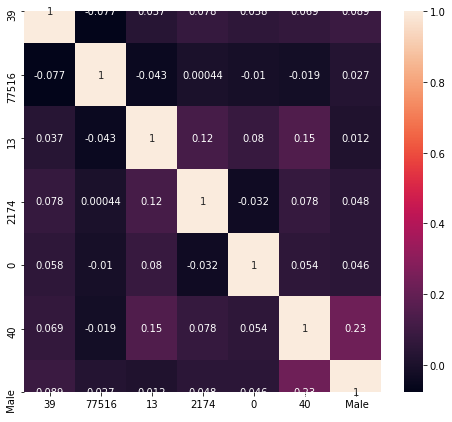

In [97]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

In [98]:
df[' <=50K'].value_counts()

 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

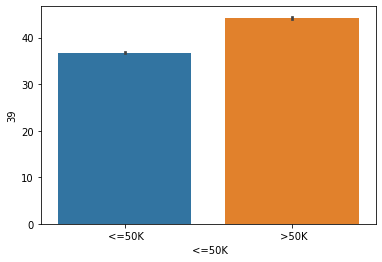

In [102]:
#lets check the salary as per the age
sns.barplot(x=' <=50K',y='39',data=df)
plt.show()

In [104]:
df.dtypes

39         int64
77516      int64
13         int64
2174       int64
0          int64
40         int64
 <=50K    object
 Male      uint8
dtype: object

In [112]:
#Lets convert <=50k by 1
df = df.replace(' <=50K',1)


In [114]:
#lets convert >50K by 0
df = df.replace(' >50K',0)

In [115]:
df.head(10)

,39,77516,13,2174,0,40,<=50K,Male
0,50,83311,13,0,0,13,1,1
1,38,215646,9,0,0,40,1,1
2,53,234721,7,0,0,40,1,1
3,28,338409,13,0,0,40,1,0
4,37,284582,14,0,0,40,1,0
5,49,160187,5,0,0,16,1,0
6,52,209642,9,0,0,45,0,1
7,31,45781,14,14084,0,50,0,0
8,42,159449,13,5178,0,40,0,1
9,37,280464,10,0,0,80,0,1


In [116]:
#Lets change the name of the male column
df = df.rename(columns={" <=50K":"Target"})

In [117]:
df.head(10)

,39,77516,13,2174,0,40,Target,Male
0,50,83311,13,0,0,13,1,1
1,38,215646,9,0,0,40,1,1
2,53,234721,7,0,0,40,1,1
3,28,338409,13,0,0,40,1,0
4,37,284582,14,0,0,40,1,0
5,49,160187,5,0,0,16,1,0
6,52,209642,9,0,0,45,0,1
7,31,45781,14,14084,0,50,0,0
8,42,159449,13,5178,0,40,0,1
9,37,280464,10,0,0,80,0,1


In [118]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(32560, 8)
(29827, 8)


In [119]:
#lets separate x and y
df_x = df_final.drop(columns=["Target"],axis=1)
y = df_final[["Target"]]

In [120]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [121]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [122]:
print(y_train.shape,y_test.shape)

(23861, 1) (5966, 1)


In [123]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [124]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [125]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [126]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.813778075762655


cross_val_score =  0.8071210687136217


roc_auc_curve 0.7199256557026994


classification_report               precision    recall  f1-score   support

           0       0.59      0.55      0.57      1327
           1       0.87      0.89      0.88      4639

    accuracy                           0.81      5966
   macro avg       0.73      0.72      0.72      5966
weighted avg       0.81      0.81      0.81      5966



[[ 731  596]
 [ 515 4124]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',

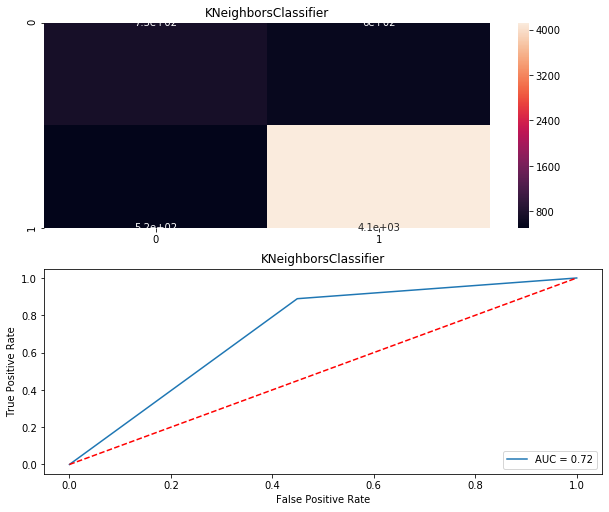

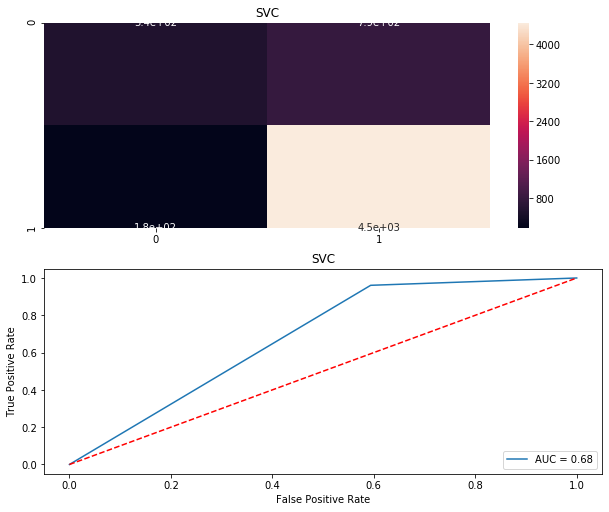

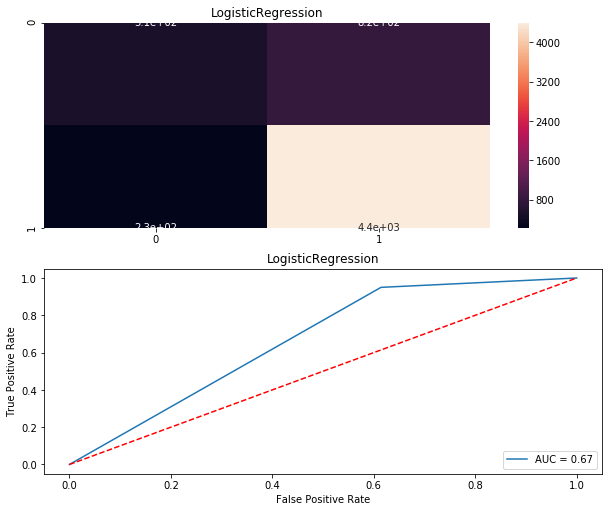

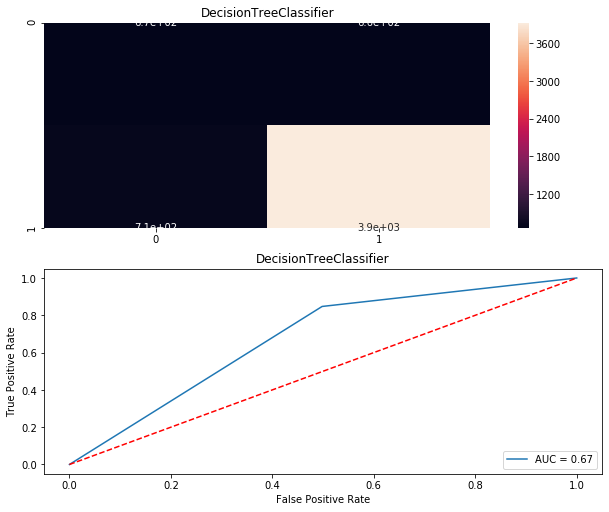

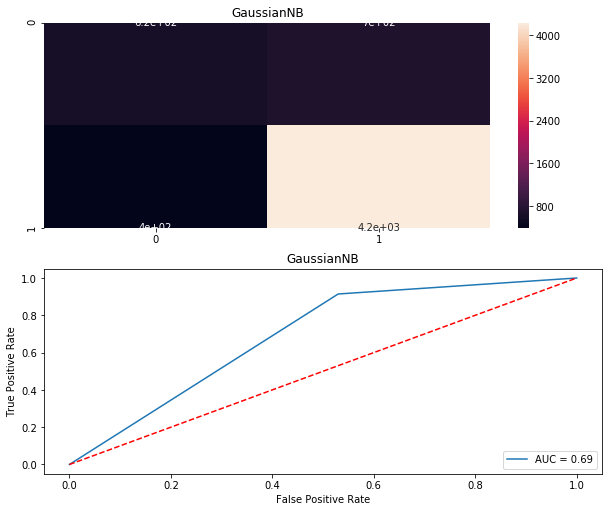

In [127]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [128]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,81.377808,80.712107,71.992566
1,SVC,83.741200,83.742967,68.347338
2,LogisticRegression,82.433791,82.770701,66.780318
3,DecisionTreeClassifier,77.053302,77.962940,67.463242
4,GaussianNB,81.545424,81.972771,69.221963


# I will choose SVC for this model as it is giving higher accuracy

In [129]:
from sklearn.externals import joblib

In [130]:
joblib.dump(SV , 'model_adultDataset.pkl')

['model_adultDataset.pkl']

In [131]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)